<H1 style ='color :b;background-color:AliceBlue;border-style: dotted; padding : 15px'> <ul>
    <li>(Medical Data Visualizer)
    <li style='color: darkcyan'>  by (Mohamed Ahmed Hassan) </li>
    <li style='color: orange'>  Data preprocessing and data Normalization </li>
    <li style='color: orange'> Data Visualization with Seaborn</li>

- Importing Neceassary Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Explore the data to understand its structure:

In [3]:
#Explore the data to understand its structure:

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None
                 id           age           sex        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349843

In [4]:
# Add 'overweight' column

# Calculate the BMI for each person
df['BMI'] = df['weight'] / ((df['height']/100) ** 2)

# Add the overweight column
df['overweight'] = (df['BMI'] > 25).astype(int)

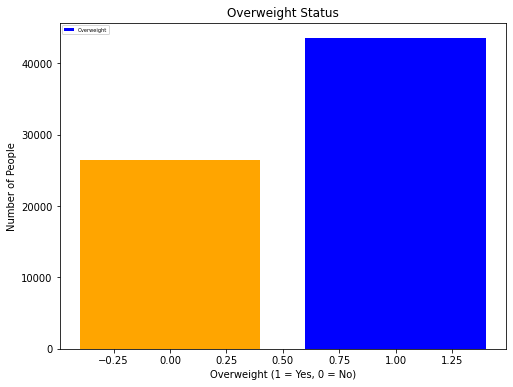

In [5]:
# Set the size of the figure
fig = plt.figure(figsize=(8, 6))

# Count the number of people who are overweight and not overweight
overweight_counts = df['overweight'].value_counts()

# Define the colors for the bars
colors = ['blue', 'orange']

# Create a bar plot
plt.bar(overweight_counts.index, overweight_counts.values, color=colors)

# Add labels and a title
plt.title('Overweight Status')
plt.xlabel('Overweight (1 = Yes, 0 = No)')
plt.ylabel('Number of People')

# Add a legend
plt.legend([ 'Overweight','Not overweight'], loc='upper left',fontsize=5)

# Show the plot
plt.show()

In [6]:
df['overweight'].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

## Will perform data normalization to avoid issues as we deal with diff. scales


In [7]:

# Normalize data by making 0 always good and 1 always bad.
#If the value of 'cholesterol' or 'gluc' is 1,
#make the value 0. If the value is more than 1, make the value 1

def normalize(value):
    if value == 1:
        return 0
    elif value > 1:
        return 1
    else:
        return value

# Normalize 'cholesterol' and 'glu' columns
df["cholesterol"] = df['cholesterol'].apply(normalize)
df["gluc"] = df["gluc"].apply(normalize)



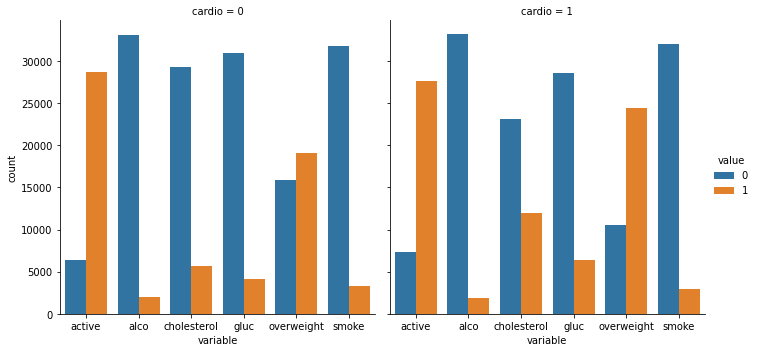

In [8]:
# Convert the DataFrame into long format
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['active','alco','cholesterol', 'gluc', 'overweight','smoke'])

# Create a catplot with 'Cardio' as the hue and split by 'Cardio'
sns.catplot(x='variable', hue='value', col='cardio', data=df_long, kind='count')

# Show the plot
plt.show()

In [9]:
# Filter out incorrect data
df = df[(df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) & 
        (df['height'] <= df['height'].quantile(0.975)) & 
        (df['weight'] >= df['weight'].quantile(0.025)) &        (df['weight'] <= df['weight'].quantile(0.975))]

# Save the cleaned data to a new csv file
df.to_csv('cleaned_patient_data.csv', index=False)


In [10]:
df_cleaned = pd.read_csv("cleaned_patient_data.csv")
df_cleaned.shape

(63259, 15)

possible color palletes
----
coolwarm-  
magma
inferno
plasma
cividis
twilight
cool
hot
autumn
winter
spring
summer
gist_earth
terrain
ocean 
 BuGn
YlOrRd
    PuGn
    PuRd
    GnBu
    YlGnBu
    PuBu
    RdPu9.
    YlGn`
    Blues                    
    viridis
    plasma
    magma
    inferno
    cividis


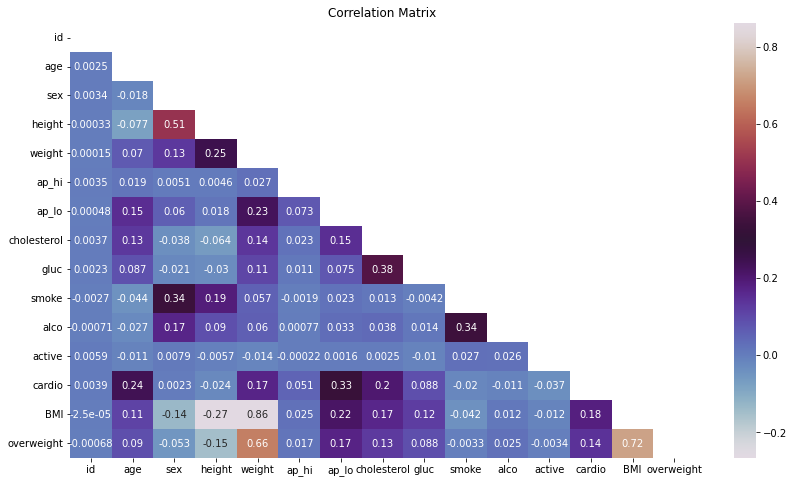

<Figure size 432x288 with 0 Axes>

In [11]:

import seaborn as sns
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = df.corr()

# Create a boolean mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set the size of the figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the correlation matrix using seaborn's heatmap
sns.heatmap(corr_matrix, annot=True, cmap='twilight', mask=mask)
plt.title('Correlation Matrix')
plt.show()
plt.savefig("correlation_matrix2x.png")

Text(0.5, 1.0, 'Correlation Matrix')

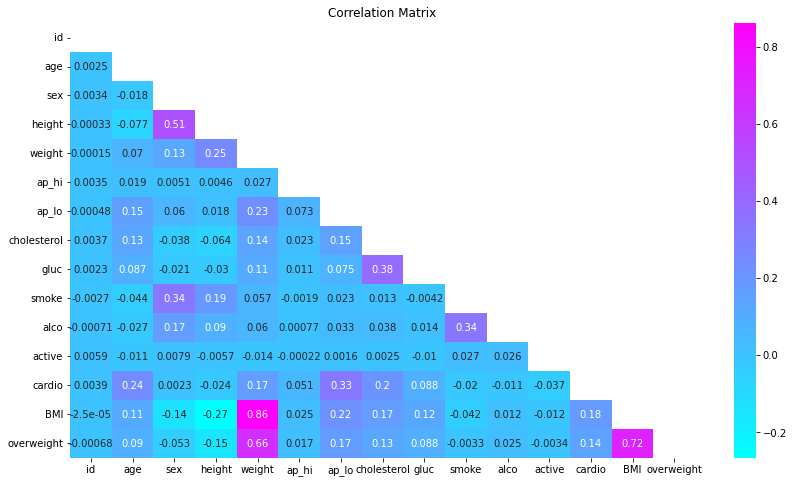

In [19]:
import seaborn as sns
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np


corr_matrix = df_cleaned.corr()

# Create a boolean mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set the size of the figure
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the correlation matrix using seaborn's heatmap
sns.heatmap(corr_matrix, annot=True, cmap='cool', mask=mask)
plt.title('Correlation Matrix')



In [ ]:
##--allow-chromium-download

In [ ]:
#!jupyter nbconvert 'Presentation Slides with Jupyter Notebook.ipynb' --to slides --post serve

In [ ]:
#!jupyter nbconvert "Medical_Data_Visualizer".ipynb --to slides --post serve --template output_toggle